In [727]:
# Colby Bailey
# data science summer 2023
# UTSA Student ID: nib667

In [728]:
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import datetime

In [729]:
%matplotlib inline

In [730]:
dly_delimiter = [11,4,2,4] + [5,1,1,1] * 31
dly_usecols = [1,2,3] + [4*i for i in range(1,32)]
dly_dtype = [np.int32,np.int32,(np.str_,4)] + [np.int32] * 31
dly_names = ['year','month','obs'] + [str(day) for day in range(1,31+1)]

In [731]:
# INSTRUCTOR CODE
def parsefile(filename):
    return np.genfromtxt(filename,
                         delimiter = dly_delimiter,
                         usecols = dly_usecols,
                         dtype = dly_dtype,
                         names = dly_names)

In [732]:
# INSTRUCTOR CODE
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates = np.arange(startdate,startdate + np.timedelta64(1,'M'),np.timedelta64(1,'D'))
    
    rows = [(date,record[str(i+1)]/10) for i,date in enumerate(dates)]
    
    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])

In [733]:
# INSTRUCTOR CODE
def getobs(filename,obs):
    data = np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])
    
    data['value'][data['value'] == -999.9] = np.nan
    
    return data

In [734]:
# INSTRUCTOR CODE
def fillnans(data):
    dates_float = data['date'].astype(np.float64)
    
    nan = np.isnan(data['value'])
    
    data['value'][nan] = np.interp(dates_float[nan],dates_float[~nan],data['value'][~nan])

In [735]:
# INSTRUCTOR CODE
def selectyear(data,year):
    start = np.datetime64('{}'.format(year))
    end = start + np.timedelta64(1,'Y')
    
    return data[(data['date'] >= start) & (data['date'] < end)]['value']

In [736]:
# TASK 1
zip_path = 'weather.zip'
with zipfile.ZipFile( zip_path, 'r' ) as zip_ref:
    zip_ref.extractall( )

In [737]:
ls -l weather

total 47888
-rw-r--r--  1 bagoferasers  staff  1711530 Jun 27 21:47 RSM00030710.dly
-rw-r--r--  1 bagoferasers  staff  4165020 Jun 27 21:47 USW00014922.dly
-rw-r--r--  1 bagoferasers  staff  3692790 Jun 27 21:47 USW00022536.dly
-rw-r--r--  1 bagoferasers  staff  3502710 Jun 27 21:47 USW00023188.dly
-rw-r--r--@ 1 bagoferasers  staff    44303 Jun 27 21:47 project2.ipynb
-rw-r--r--  1 bagoferasers  staff    24088 Jun 27 21:47 readme.txt
-rw-r--r--  1 bagoferasers  staff  8523546 Jun 27 21:47 stations.txt
-rw-r--r--  1 bagoferasers  staff      576 Jun 27 21:47 weather.README


In [738]:
# TASK 2
## A)
filename = 'weather/USW00014922.dly'
obs = 'TMAX'
tmax_series = getobs(filename,obs)
minneapolis = parsefile(filename)
minneapolis

array([(1938, 4, 'TMAX', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, 106,   189,   172,   217,   256,   194,   117,   133,   228,   217,   172,   144,    89,   144,  94,   111,   156,   267,   256,   156,   144,   222, -9999),
       (1938, 4, 'TMIN', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -17,    11,    61,    28,    78,    78,    72,   106,   106,    72,    11,    -6,    17,    -6,  39,    56,    44,   117,   156,    39,    17,    44, -9999),
       (1938, 4, 'PRCP', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,   0,     0,     0,     0,     0,   267,    64,   193,    58,     0,     0,     3,    25,     0, 119,    10,     0,     0,    36,    56,     0,     0, -9999),
       ...,
       (2015, 9, 'WT01',     1,     1,     1,     1,     1,     1, -9999,     1,   1,     1, -9999, -9999, -9999, -9999, -9999, -9999,     1, -9999, -9999, -9999, -9999,     1,   1,     1,     1,     1, -9999, -9999, -9999, -9999, -9999),
       (2015, 9, 'WT03', -9999, 

In [739]:
unroll(minneapolis[0])

array([('1938-04-01', -999.9), ('1938-04-02', -999.9),
       ('1938-04-03', -999.9), ('1938-04-04', -999.9),
       ('1938-04-05', -999.9), ('1938-04-06', -999.9),
       ('1938-04-07', -999.9), ('1938-04-08', -999.9),
       ('1938-04-09',   10.6), ('1938-04-10',   18.9),
       ('1938-04-11',   17.2), ('1938-04-12',   21.7),
       ('1938-04-13',   25.6), ('1938-04-14',   19.4),
       ('1938-04-15',   11.7), ('1938-04-16',   13.3),
       ('1938-04-17',   22.8), ('1938-04-18',   21.7),
       ('1938-04-19',   17.2), ('1938-04-20',   14.4),
       ('1938-04-21',    8.9), ('1938-04-22',   14.4),
       ('1938-04-23',    9.4), ('1938-04-24',   11.1),
       ('1938-04-25',   15.6), ('1938-04-26',   26.7),
       ('1938-04-27',   25.6), ('1938-04-28',   15.6),
       ('1938-04-29',   14.4), ('1938-04-30',   22.2)],
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [740]:
minneapolis_tmax = getobs(filename, obs)

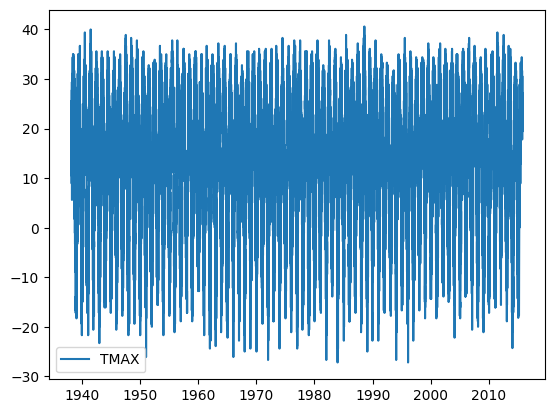

In [741]:
plt.plot(minneapolis_tmax['date'],minneapolis_tmax['value'], label="TMAX")
plt.legend(loc="best")
plt.show()

In [742]:
fillnans(minneapolis_tmax)

In [743]:
np.mean(minneapolis_tmax['value'])

12.74308121666019

In [744]:
minneapolis_mean = {}
for year in range(1940,2015):
    tmax_selected = selectyear(minneapolis_tmax, year)
    minneapolis_mean[year] = (np.mean(tmax_selected))

In [745]:
minneapolis_mean

{1940: 11.806830601092894,
 1941: 13.825479452054795,
 1942: 12.755616438356165,
 1943: 11.874520547945204,
 1944: 13.081693989071038,
 1945: 11.643013698630138,
 1946: 13.432602739726027,
 1947: 12.543287671232877,
 1948: 13.31857923497268,
 1949: 13.542191780821916,
 1950: 10.856986301369862,
 1951: 10.44876712328767,
 1952: 12.758469945355193,
 1953: 13.643561643835616,
 1954: 12.784931506849318,
 1955: 12.961917808219178,
 1956: 12.621311475409835,
 1957: 12.498630136986302,
 1958: 13.104383561643836,
 1959: 12.94986301369863,
 1960: 12.152185792349728,
 1961: 12.487671232876712,
 1962: 11.2213698630137,
 1963: 12.856164383561644,
 1964: 13.271584699453554,
 1965: 11.08904109589041,
 1966: 11.892054794520547,
 1967: 11.477808219178081,
 1968: 12.546994535519126,
 1969: 12.271780821917808,
 1970: 12.07945205479452,
 1971: 12.018356164383562,
 1972: 10.244535519125684,
 1973: 13.116438356164384,
 1974: 12.26849315068493,
 1975: 12.264657534246576,
 1976: 13.805464480874315,
 1977: 12

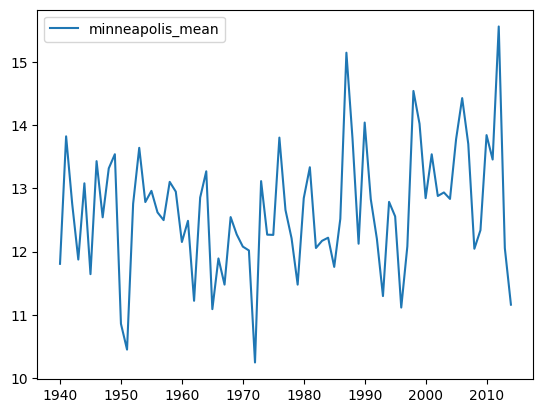

In [746]:
plt.plot(list(minneapolis_mean.keys()), list(minneapolis_mean.values()), label="minneapolis_mean")
plt.legend(loc="best")
plt.show()

In [747]:
## B)
highest_mean_tmax = np.argmax(list(minneapolis_mean.values()))
highest_mean_tmax_year = list(minneapolis_mean.keys())[highest_mean_tmax]

In [748]:
highest_mean_tmax_year

2012

In [749]:
## C)
selected_year = selectyear(tmax_series, highest_mean_tmax_year)

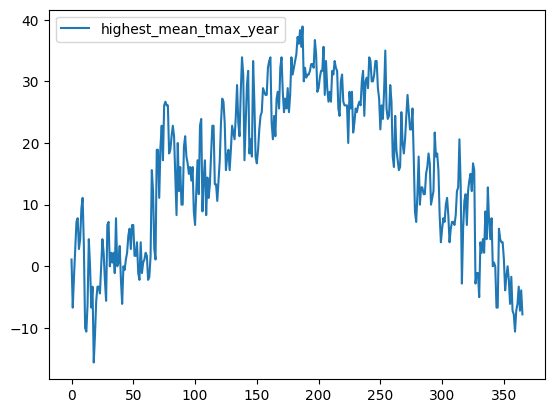

In [750]:
plt.plot(selected_year, label='highest_mean_tmax_year')
plt.legend(loc='best')
plt.show()

In [751]:
# TASK 3
## A)
filename = 'weather/USW00023188.dly'
obs = 'TMIN'
tmin_series = getobs(filename,obs)
sandiego = parsefile(filename)
sandiego

array([(1939, 7, 'TMAX',   244,   233,   217,   217,   222,   222,   239,   239,   244,   244,   267,   261,   228,   233, 217,   211,   206,   222,   233,   233,   250,   244,   244,   256,   261,   256,   239,   250,   239,   244,   244),
       (1939, 7, 'TMIN',   172,   183,   167,   172,   178,   183,   161,   172,   183,   183,   172,   178,   172,   167, 156,   150,   156,   167,   156,   189,   172,   178,   178,   183,   194,   178,   178,   172,   183,   183,   189),
       (1939, 7, 'PRCP',     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,   0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0),
       ...,
       (2015, 9, 'WSF5',    72,    76,    76,    81,    81,    76,    81,    94,   103,    72,    58,    72,    63,    76, 125,    76,    81, -9999,    63,    98,    89,    67,    76,    67,    67,    63, -9999, -9999, -9999, -9999, -9999),
       (2015, 9, 'WT01',

In [752]:
unroll(sandiego[0])

array([('1939-07-01', 24.4), ('1939-07-02', 23.3), ('1939-07-03', 21.7),
       ('1939-07-04', 21.7), ('1939-07-05', 22.2), ('1939-07-06', 22.2),
       ('1939-07-07', 23.9), ('1939-07-08', 23.9), ('1939-07-09', 24.4),
       ('1939-07-10', 24.4), ('1939-07-11', 26.7), ('1939-07-12', 26.1),
       ('1939-07-13', 22.8), ('1939-07-14', 23.3), ('1939-07-15', 21.7),
       ('1939-07-16', 21.1), ('1939-07-17', 20.6), ('1939-07-18', 22.2),
       ('1939-07-19', 23.3), ('1939-07-20', 23.3), ('1939-07-21', 25. ),
       ('1939-07-22', 24.4), ('1939-07-23', 24.4), ('1939-07-24', 25.6),
       ('1939-07-25', 26.1), ('1939-07-26', 25.6), ('1939-07-27', 23.9),
       ('1939-07-28', 25. ), ('1939-07-29', 23.9), ('1939-07-30', 24.4),
       ('1939-07-31', 24.4)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [753]:
sandiego_tmin = getobs(filename, obs)

In [754]:
fillnans(sandiego_tmin)

In [755]:
np.mean(sandiego_tmin['value'])

13.958362356827402

In [756]:
sandiego_mean = {}
for year in range(1940,2015):
    tmin_selected = selectyear(sandiego_tmin, year)
    sandiego_mean[year] = (np.mean(tmin_selected))

In [757]:
sandiego_mean

{1940: 13.361202185792349,
 1941: 13.337534246575345,
 1942: 12.463561643835616,
 1943: 12.86931506849315,
 1944: 12.036338797814208,
 1945: 12.68109589041096,
 1946: 12.815342465753426,
 1947: 12.644931506849314,
 1948: 11.65327868852459,
 1949: 12.166575342465753,
 1950: 12.726849315068494,
 1951: 12.907397260273969,
 1952: 12.751912568306013,
 1953: 12.876712328767123,
 1954: 13.330684931506852,
 1955: 12.907123287671235,
 1956: 13.008196721311476,
 1957: 14.014520547945208,
 1958: 14.335068493150683,
 1959: 14.75068493150685,
 1960: 13.243169398907105,
 1961: 13.307671232876713,
 1962: 12.722739726027397,
 1963: 13.153424657534247,
 1964: 12.53032786885246,
 1965: 12.937260273972603,
 1966: 13.532876712328767,
 1967: 13.470958904109589,
 1968: 13.945628415300547,
 1969: 14.03945205479452,
 1970: 14.176164383561645,
 1971: 13.372328767123287,
 1972: 13.902185792349727,
 1973: 13.835890410958905,
 1974: 13.954520547945204,
 1975: 13.209863013698632,
 1976: 15.010382513661202,
 1977: 

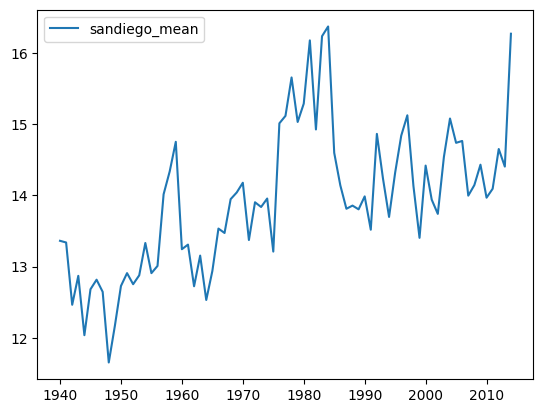

In [758]:
plt.plot(list(sandiego_mean.keys()), list(sandiego_mean.values()), label="sandiego_mean")
plt.legend(loc="best")
plt.show()

In [759]:
## B)
highest_mean_tmin = np.argmax(list(sandiego_mean.values()))
highest_mean_tmin_year = list(sandiego_mean.keys())[highest_mean_tmin]

In [760]:
highest_mean_tmin_year

1984

In [761]:
## C)
selected_year = selectyear(tmin_series, highest_mean_tmin_year)

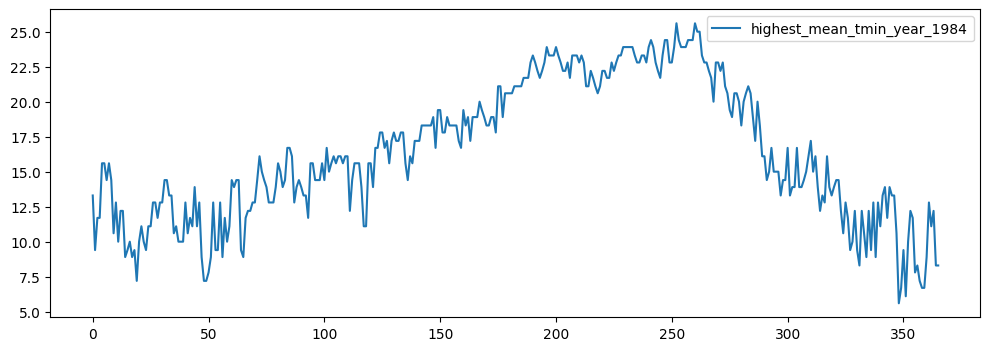

In [791]:
label_text = 'highest_mean_tmin_year_{}'.format(highest_mean_tmin_year)
plt.figure(figsize=(12,4))
plt.plot(selected_year, label=label_text)
plt.legend(loc='best')
plt.show()

In [763]:
# TASK 4
minneapolis_filename = 'weather/USW00014922.dly'
sandiego_filename = 'weather/USW00023188.dly'
tmax_obs = 'TMAX'
tmin_obs = 'TMIN'

In [764]:
minneapolis = parsefile(minneapolis_filename)
sandiego = parsefile(sandiego_filename)

In [765]:
unroll(minneapolis[0])

array([('1938-04-01', -999.9), ('1938-04-02', -999.9),
       ('1938-04-03', -999.9), ('1938-04-04', -999.9),
       ('1938-04-05', -999.9), ('1938-04-06', -999.9),
       ('1938-04-07', -999.9), ('1938-04-08', -999.9),
       ('1938-04-09',   10.6), ('1938-04-10',   18.9),
       ('1938-04-11',   17.2), ('1938-04-12',   21.7),
       ('1938-04-13',   25.6), ('1938-04-14',   19.4),
       ('1938-04-15',   11.7), ('1938-04-16',   13.3),
       ('1938-04-17',   22.8), ('1938-04-18',   21.7),
       ('1938-04-19',   17.2), ('1938-04-20',   14.4),
       ('1938-04-21',    8.9), ('1938-04-22',   14.4),
       ('1938-04-23',    9.4), ('1938-04-24',   11.1),
       ('1938-04-25',   15.6), ('1938-04-26',   26.7),
       ('1938-04-27',   25.6), ('1938-04-28',   15.6),
       ('1938-04-29',   14.4), ('1938-04-30',   22.2)],
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [766]:
unroll(sandiego[0])

array([('1939-07-01', 24.4), ('1939-07-02', 23.3), ('1939-07-03', 21.7),
       ('1939-07-04', 21.7), ('1939-07-05', 22.2), ('1939-07-06', 22.2),
       ('1939-07-07', 23.9), ('1939-07-08', 23.9), ('1939-07-09', 24.4),
       ('1939-07-10', 24.4), ('1939-07-11', 26.7), ('1939-07-12', 26.1),
       ('1939-07-13', 22.8), ('1939-07-14', 23.3), ('1939-07-15', 21.7),
       ('1939-07-16', 21.1), ('1939-07-17', 20.6), ('1939-07-18', 22.2),
       ('1939-07-19', 23.3), ('1939-07-20', 23.3), ('1939-07-21', 25. ),
       ('1939-07-22', 24.4), ('1939-07-23', 24.4), ('1939-07-24', 25.6),
       ('1939-07-25', 26.1), ('1939-07-26', 25.6), ('1939-07-27', 23.9),
       ('1939-07-28', 25. ), ('1939-07-29', 23.9), ('1939-07-30', 24.4),
       ('1939-07-31', 24.4)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [767]:
minneapolis_tmax_series = getobs(minneapolis_filename, tmax_obs)
minneapolis_tmin_series = getobs(minneapolis_filename, tmin_obs)
sandiego_tmax_series = getobs(sandiego_filename, tmax_obs)
sandiego_tmin_series = getobs(sandiego_filename, tmin_obs)

In [768]:
fillnans(minneapolis_tmax_series)
fillnans(minneapolis_tmin_series)
fillnans(sandiego_tmax_series)
fillnans(sandiego_tmin_series)

In [773]:
minneapolis_max = {}
minneapolis_min = {}
minneapolis_tmax_selected = selectyear(minneapolis_tmax_series, 2012)
minneapolis_tmin_selected = selectyear(minneapolis_tmin_series, 2012)
for day in tmax_selected:
    minneapolis_max[day] = np.argmax(minneapolis_tmax_selected)
for day in tmin_selected:
    minneapolis_min[day] = np.argmin(minneapolis_tmin_selected)

In [772]:
sandiego_max = {}
sandiego_min = {}
sandiego_tmax_selected = selectyear(sandiego_tmax_series, 1948)
sandiego_tmin_selected = selectyear(sandiego_tmin_series, 1948)
for day in tmax_selected:
    sandiego_max[day] = np.argmax(sandiego_tmax_selected)
for day in tmin_selected:
    sandiego_min[day] = np.argmin(sandiego_tmin_selected)

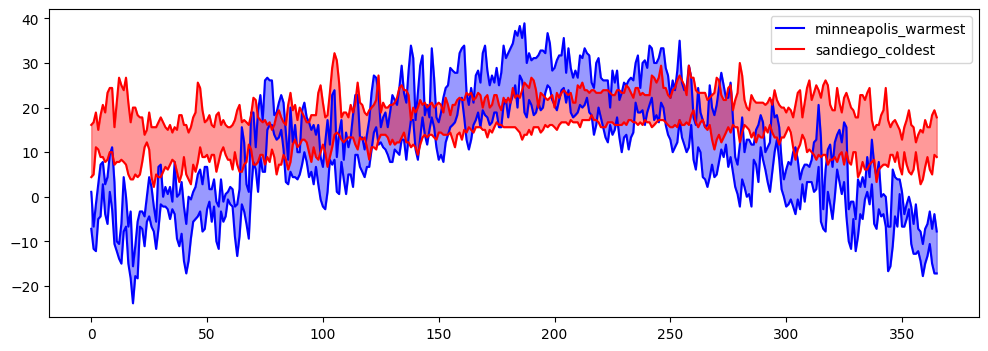

In [795]:
plt.figure(figsize=(12,4))

plt.plot(minneapolis_tmax_selected, label="minneapolis_warmest",color="blue")
plt.plot(minneapolis_tmin_selected, color="blue")
plt.fill_between(range(0,366),minneapolis_tmax_selected,minneapolis_tmin_selected,color="blue",alpha=0.4)

plt.plot(sandiego_tmax_selected, label="sandiego_coldest",color="red")
plt.plot(sandiego_tmin_selected, color="red")
plt.fill_between(range(0,366),sandiego_tmax_selected,sandiego_tmin_selected,color="red",alpha=0.4)

plt.legend(loc='best')
plt.show()